In [4]:
from heapq import merge as merge_sorted_lists
from multiprocessing import Manager, Pool
from modules.sorting import merge_sort, merge_sort_v2, merge_sort_v3, append_sorted_list
from modules.helpers import generate_random_int_list, generate_random_float_list
from modules.timing import function_timing
import matplotlib.pyplot as plt

In [5]:
def threaded_merge_sort(array, threads):
    
    # Create multiprocessing objects
    thread_manager = Manager()
    result_manager = thread_manager.list()
    pool = Pool(threads)
    
    # Add asynchronous processes to pool
    for i in range(threads):
        pool.apply_async(append_sorted_list, (result_manager, array[i::threads]))
    
    # Close pool, start, and wait till all processes are finished
    pool.close()
    pool.join()
    
    # Merge sort higher dimensional list with module merge from heapq
    return list(merge_sorted_lists(*result_manager))

Compare output algorithms:
Merge Sort vs Python Sorted: True
1 Threaded Merge VS Python Sorted: True
2 Threaded Merge VS Python Sorted: True
4 Threaded Merge VS Python Sorted: True
6 Threaded Merge VS Python Sorted: True

Compare timing algorithms:
Sorted time: 0.015367399999831832
Normal time: 0.8181964000000335
1 thread(s): 1.2872322999996868
2 thread(s): 1.1858925999999883
3 thread(s): 1.0959023999998863
4 thread(s): 1.172537899999952
5 thread(s): 1.2632620000003953
6 thread(s): 1.406014299999697
7 thread(s): 1.4353707000000213
8 thread(s): 1.5491078000000016


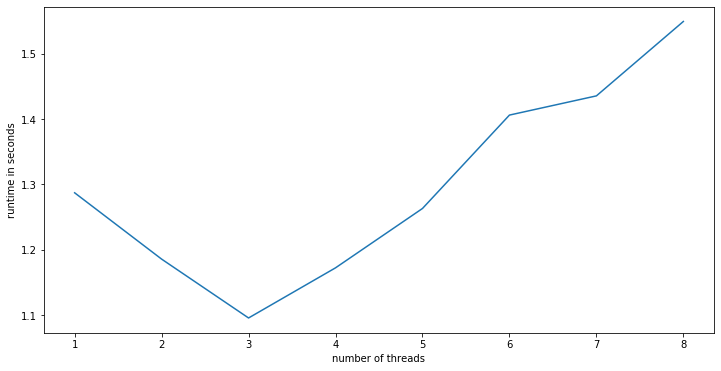

In [6]:
if __name__ == '__main__':
    
    # Random list with floats or ints
    array = generate_random_int_list(200000)
    
    # Test functions
    print("Compare output algorithms:")
    print("Merge Sort vs Python Sorted: " + str(merge_sort_v3(array) == sorted(array)))
    print("1 Threaded Merge VS Python Sorted: " + str(threaded_merge_sort(array, 1) == sorted(array)))
    print("2 Threaded Merge VS Python Sorted: " + str(threaded_merge_sort(array, 2) == sorted(array)))
    print("4 Threaded Merge VS Python Sorted: " + str(threaded_merge_sort(array, 4) == sorted(array)))
    print("6 Threaded Merge VS Python Sorted: " + str(threaded_merge_sort(array, 6) == sorted(array)))
    print()
    
    # Timings
    results = []
    print("Compare timing algorithms:")
    print("Sorted time: " + str(function_timing(sorted, 1, array)))
    print("Normal time: " + str(function_timing(merge_sort_v3, 1, array)))
    for i in range(1, 9):
        timing = function_timing(threaded_merge_sort, 1, array, i)
        print(f"{i} thread(s): " + str(timing))
        results.append(timing)
    
    # Plot timings
    plt.figure(figsize=(12,6))
    plt.plot(list(range(1, len(results)+1)), results)
    plt.xlabel("number of threads")
    plt.ylabel("runtime in seconds")
    plt.xticks(list(range(1,len(results)+1)))